## Data Generation
This notebook is used to create simulation-data for the control-scheme in ./src

In [46]:
loadfile = './src/data/load_PV3.csv'
savefile = './src/data/bounded.csv'

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv(loadfile, index_col=False).drop(['Unnamed: 0', 'Grid_cap'], axis =1)
df.head(2)

,PV,P1,P2,Spot_pris
0,0.0,1.029876,15.097973,1.59
1,0.0,1.167668,16.008258,1.59


In [49]:
pv = df['PV']
temp_pv = np.clip(pv + pv*np.random.normal(0, 0.08, pv.shape[0]), 0, np.inf)
#pv[55:70] = 15 + np.random.normal(10, 5, 15)

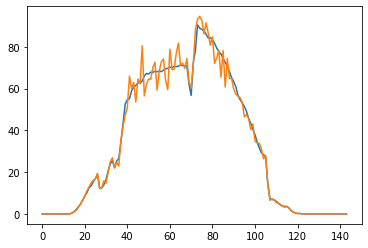

In [50]:
plt.plot(range(pv.shape[0]), pv)
plt.plot(range(pv.shape[0]), temp_pv)
plt.show()

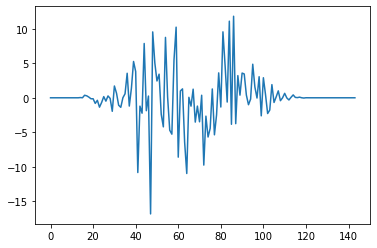

In [51]:
e = pv-temp_pv
plt.plot(range(e.shape[0]), e)

In [52]:
print(np.mean(temp_pv)-np.mean(pv))
print(np.std(pv-temp_pv))
print(np.max(pv-temp_pv)/np.max(pv))
print(np.min(pv-temp_pv))
print(np.mean(pv-temp_pv))
np.percentile(pv-temp_pv, 1), np.percentile(pv-temp_pv, 99)

-0.011868473181507966
3.678817130013675
0.13076973167821893
-16.847710401275535
0.011868473181512233


(-10.922896610665724, 10.741590094267469)

In [53]:
df['PV_pred'] = temp_pv
df['PL_pred'] = df.P1 + df.P2
df

,PV,P1,P2,Spot_pris,PV_pred,PL_pred
0,0.0,1.029876,15.097973,1.59,0.0,16.127849
1,0.0,1.167668,16.008258,1.59,0.0,17.175926
2,0.0,1.382812,17.644800,1.59,0.0,19.027612
3,0.0,1.462171,16.720865,1.59,0.0,18.183036
4,0.0,1.405016,16.259335,1.59,0.0,17.664352
...,...,...,...,...,...,...
139,0.0,1.125000,15.074074,1.47,0.0,16.199074
140,0.0,1.235119,14.718585,1.47,0.0,15.953704
141,0.0,1.276042,14.805511,1.47,0.0,16.081553
142,0.0,1.335069,14.870415,1.47,0.0,16.205484


In [54]:
df.to_csv(savefile)

In [13]:
df['PV'].mean()

33.19491464120155